# **Ejercicios 5 y 6**

# Brillo y contraste

En el presente ejercicio se introducen los conceptos de brillo y contraste, analizando su significado y las diferencias entre ambos.

En primer lugar, el brillo corresponde al nivel medio de intensidad de la imagen. Es decir, a su claridad u oscuridad general. Esto implica que un aumento del brillo de una imagen aclarará todos los colores presentes. En términos del histograma, esto se reflejará como un desplazamiento hacia la derecha (hacia los blancos) de todo el conjunto de valores. A la inversa, la disminución del brillo oscurecerá todos los colores, por lo cual el histograma se desplazará a la izquierda, resultando más cerca del negro absoluto.

Con respecto al contraste, este es la relación entre las regiones más claras y el más oscuras de la imagen. Así, aumentar el contraste en una imagen incrementará la diferencia entre las zonas claras y las oscuras, de modo que las zonas claras se volverán más claras y las oscuras, más oscuras. A diferencia de lo que sucede con el brillo. En este caso, un aumento del histograma implica un estiramiento horizontal del histograma. Por el contrario, una reducción del contraste genera que el histograma se comprima y que las zonas claras y oscuras sean progresivamente más difíciles de reconocer.

Las diferencias entre los conceptos de brillo y contraste se pueden analizar en relación a los cambios en los resultados visuales obtenidos o a la transformación que sufre el histograma al modificarlos. 

Visualmente, una modificación del brillo cambiará la luminosidad percibida pero los valores que toman los píxeles de la imagen resultante se encontrarán entre ellos a la misma distancia (diferencia entre dos valores) que anteriormente. De esta forma, si a una imagen se le aumenta su brillo, todas las secciones de la imagen, tanto las oscuras como las claras, serán modificadas en la misma magnitud. Esto se puede analizar como la adición (o resta) de una misma constante (o una señal continua) a todos los píxeles presentes. Esto implica que las zonas son igualmente reconocibles que en la imagen original, aunque ahora con mayor o menor luminosidad. Por el contrario, en el caso de una modificación del contraste sí se aprecia un aumento o disminución en la capacidad de distinguir las distintas zonas presentes. Esto se debe a que en este caso sí se modifica la distancia entre los valores que toman los píxeles y, de esta forma, en caso de que se esté realizando un aumento en el contraste, las regiones claras y oscuras sean convertidas en regiones aún más claras y oscuras respectivamente.

En la siguiente imagen se pueden observar las diferencias visuales observadas al aumentar y al disminuir tanto el brillo como el contraste a fin de comprobar lo que fue descripto anteriormente.

![](../../assets/ej5-6/brillo_contraste.jfif)

La primera columna muestra los cambios ocurridos al modificar el contraste. Evidentemente, las regiones claras y oscuras son considerablemente más distinguibles que al disminuir el contraste. En el caso del brillo también se cumple lo descripto; en este caso las regiones no son más distinguibles entre sí pero la luminosidad general de la imagen cambia.

En cuanto a las modificaciones del histograma al modificar estas características, se producen dos efectos distintos. Mientras que, como fue mencionado, en el caso del brillo el histograma sufre un desplazamiento horizontal (manteniendo su forma original), en el caso del contraste el histograma sufre una compresión o un estiramiento, también horizontal. Dichos resultados generan entonces las diferencias visuales explicadas.

En lo subsiguiente del ejercicio se ejecutan distintos algoritmos que permiten modificar el brillo y el contraste de distintas imágenes. Al realizar esto se pueden apreciar los efectos descriptos en esta sección tanto en lo visual como en el histograma.


# Implementación

En este ejercicio se busca escribir un código que modifique el brillo y el contraste de una imagen. A fin de realizarlo, se implementará lo mencionado mediante dos maneras. En primer lugar, se realizará utilizando la librería OpenCV, la cual cuenta con funciones que permiten obtener tales resultados. Luego, se buscará arribar a los mismos resultados utilizando la función imadjust utilizada en ejercicios previos.

In [1]:
import matplotlib.pyplot as plt
from ipywidgets import interact
import cv2
import numpy as np
import sys
from PIL import Image
# Add the folder path to the sys.path list
sys.path.append('../../src/helpers/')
from plot_histogram import plot_histogram
from imadjust import imadjust

## Mediante OpenCV

La librería OpenCV cuenta con la función convertScaleAbs, la cual permite escalar una serie de valores de acuerdo a los parámetros $\alpha$ y $\beta$ que reciba. Se puede representar a dicha transformación de acuerdo a la siguiente expresión: $$g(i,j) = \alpha \cdot f(i,j) + \beta$$ donde $f$ representa al conjunto de valores de entrada y $g$ a los de salida.

En dicha transformación, el parámetro $\beta$ se sumará como una constante a todos los valores del conjunto (en nuestro caso la imagen). Consecuentemente, todos los valores de la imagen se tornarán más claros o más oscuros dependiendo de si dicho parámetro es positivo o negativo respectivamente. Por lo tanto, la variación de $\alpha$ implica un desplazamiento horizontal del histograma, lo que representa una variación del brillo de la imagen. Por otra parte, el parámetro $\alpha$ multiplica a todos los valores del conjunto. Dicho comportamiento se interpreta como un estiramiento o una compresión del histograma, dependiendo nuevamente de si el parámetro es positivo o negativo respectivamente. Asimismo, el hecho de estirar o comprimir el histograma representa un aumento o una disminución del contraste de la imagen final. 

En resumen, la función convertScaleAbs de OpenCV permite modificar el brillo mediante el parámetro $\alpha$ y el contraste mediante el parámetro $\beta$.

In [2]:
city_cv = cv2.imread('../../assets/ej5-6/city.jpg')


In [3]:
@interact(contrast=(0.0, 3.0), bright=(0,100))
def change_brightness(bright, contrast):
    adjusted_cv = cv2.convertScaleAbs(city_cv, alpha=3-contrast, beta=bright)
    plt.axis('off')
    plt.imshow(adjusted_cv, cmap='gray')


interactive(children=(IntSlider(value=50, description='bright'), FloatSlider(value=1.5, description='contrast'…

## Manualmente

In [4]:
scale = np.array(Image.open('../../assets/ej5-6/grayscale.jpg'), dtype=np.uint8)  # Open
city = np.array(Image.open('../../assets/ej5-6/city.jpg'), dtype=np.uint8)  # Open

### Brillo

Como se explicó en el caso de OpenCV, la modificación del brillo de una imagen consta de una suma de una constante a todos sus valores.

In [5]:
@interact(bright=(-255, 255,5))
def change_brightness(bright):

    new_br = np.array(city, dtype=np.uint16)
    
    new_br = new_br + bright 

    # Límites
    new_br[new_br > 255] = 255
    new_br[new_br < 0] = 0

    # 8 bits
    new_br = np.array(new_br, dtype=np.uint8)

    plt.axis('off')
    plt.imshow(new_br)

    # Plot histograma
    _ = plot_histogram(new_br, title='Histogram')

interactive(children=(IntSlider(value=0, description='bright', max=255, min=-255, step=5), Output()), _dom_cla…

En los resultados anteriores se puede verificar que el brillo de la imagen varía adecuademente dependiendo del valor seleccionado. Además, observando el histograma a medida que este parámetro varía, se puede constatar que la variación del brillo implica un desplazamiento del histograma hacia la derecha o hacia la izquierda dependiendo de si se está aclarando u oscureciendo la imagen respectivamente.

### Contraste

Con respecto al contraste, fue mencionado anteriormente que este puede ser modificado al expandir o comprimir el histograma. Para ello se puede utilizar la función imadjust creada para ejercicios previos de este trabajo. Dicha función realiza una transformación a la imagen que recibe como parámetro y transforma un rango determinado de valores en otro. En este caso, el rango inicial de valores es de 0 a 1 para abarcar a todos los componentes de la imagen. Y, el rango final se encuentra determinado por el valor de contraste seleccionado. Cabe destacar que al aumentar el contraste parte del histograma puede resultar en valores menores a 0 o mayores a 255. En estos casos estos valores son truncados, generando que posiblemente se dejen de diferenciar ciertos sectores. 

In [6]:
@interact(contrast=(-0.5, 0.5))
def change_brightness(contrast):
    new_co = imadjust(city, 0,1,0-contrast,1+contrast)
    plt.axis('off')
    plt.imshow(new_co, cmap='gray')
    _ = plot_histogram(new_co, title='Histogram')

interactive(children=(FloatSlider(value=0.0, description='contrast', max=0.5, min=-0.5), Output()), _dom_class…

En la imagen obtenida al variar el parámetro correspondiente se aprecia como efectivamente el contraste aumenta o disminuye, provocando que exista una mayor (o menor) diferencia entre los sectores más claros y los más oscuros. A su vez, resulta muy interesante analizar la variación que ocurre en el histograma. Al ajustar el parámetro hacia valores negativos se observa claramente como el histograma es comprimido al rango de los grises medios. Mientras que, al aumentar dicho parámetro, el histograma es estirado y los valores de blanco y negro absolutos aumentan su valor debido al truncamiento efectuado al superar el rango de 0 a 255.

### Brillo y contraste

A continuación se unifican las funciones realizadas para controlar el brillo y el contraste de tal manera que se puedan probar distintas combinaciones de estas características.

In [7]:
@interact(contrast=(-0.5, 0.5), bright=(-255, 255, 5))
def change_brightness_contrast(contrast, bright):

    # Contraste
    new_br_co = imadjust(city, 0,1,0-contrast,1+contrast)

    new_br_co = np.array(new_br_co, dtype=np.uint16)
    
    # Brillo
    new_br_co = new_br_co + bright 

    # Límites
    new_br_co[new_br_co > 255] = 255
    new_br_co[new_br_co < 0] = 0

    # 8 bits
    new_br_co = np.array(new_br_co, dtype=np.uint8)

    plt.axis('off')
    plt.imshow(new_br_co, cmap='gray')
    _ = plot_histogram(new_br_co, title='Histogram')

interactive(children=(FloatSlider(value=0.0, description='contrast', max=0.5, min=-0.5), IntSlider(value=0, de…

Por último, se repite lo realizado con una imagen correspondiente a una escala de 10 valores de grises.

In [8]:
@interact(contrast=(-0.5, 0.5), bright=(-255, 255,5))
def change_brightness_contrast(contrast, bright):
    new_br_co_2 = imadjust(scale, 0,1,0-contrast,1+contrast)
    
    new_br_co_2 = np.array(new_br_co_2, dtype=np.uint16)
    
    # Brillo
    new_br_co_2 = new_br_co_2 + bright 

    # Límites
    new_br_co_2[new_br_co_2 > 255] = 255
    new_br_co_2[new_br_co_2 < 0] = 0

    # 8 bits
    new_br_co_2 = np.array(new_br_co_2, dtype=np.uint8)

    # Plot image
    plt.axis('off')
    plt.imshow(new_br_co_2, cmap='gray')

    # Plot histograma
    _ = plot_histogram(new_br_co_2, title='Histogram')

interactive(children=(FloatSlider(value=0.0, description='contrast', max=0.5, min=-0.5), IntSlider(value=0, de…

Utilizando la imagen de la escala de grises y la función anterior resultan evidentes los efectos de las variaciones del brillo y del contraste. Se observa que al aumentar el contraste las franjas más claras se tornan aún más claras y análogamente para las más oscuras. A su vez, las franjas de blanco y negro absolutos aumentan su tamaño debido al truncamiento explicado con anterioridad. Agregando a lo anterior, al disminuir el contraste, los 10 picos presentes en el histograma se comprimen hacia su centro, alcanzando finalmente un único pico. Por otro lado, al variar el brillo el histograma es desplazado horizontalmente debido a que todos los valores aumentan o disminuyen debido a la suma de una constante. Esto es fácilmente apreciable habiendo disminuido al contraste dado que el histograma se encontrará comprimido en tal caso.

## Función Final

La siguiente función permite obtener los valores de la imagen modificada utilizando los parámetros recibidos. Mientras que las funciones anteriores fueron pensadas para realizar pruebas utilizando los sliders correspondientes de la librería ipywidgets, esta función es implementada a fin de poder ser utilizada para casos reales si se lo requiriera.

In [9]:
def control_brightness_contrast(image, brightness = 0, contrast=0.0):
    """
    The function modifies the brightness and the contrast of an input image.
    
    Parameters
    ----------
        'image':            array_like - The image to modify. An array that contains the image values.
        'brightness':       int - The constant value to add to all the image values.
        'contrast':         float - Te value to add (or substract) from the value range. E.g.: The range (0,1) will be modified to the range (-contrast, 1+contrast).

    Returns
    ----------
        'final_image':      array_like - The resulting image. An array that contains the image values.
    """
    np_image = np.array(image)
    np_image = imadjust(np_image, 0,1,contrast,1+contrast)
    np_image = np.array(np_image, dtype=np.uint16)
    
    # Brillo
    np_image = np_image + brightness 

    # Límites
    np_image[np_image > 255] = 255
    np_image[np_image < 0] = 0

    # 8 bits
    final_image = np.array(np_image, dtype=np.uint8)
    return final_image

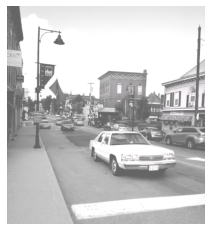

In [10]:
city2 = control_brightness_contrast(city, 50, 0.2)
# Plot image
plt.axis('off')
plt.imshow(city2, cmap='gray')
plt.show()


## Conclusión

A modo de conclusión, en el presente ejercicio se desarrollaron los conceptos de brillo y contraste junto con sus diferencias. Luego, se implementó, tanto utilizando la librería OpenCV como la función imadjust realizada manualmente, funciones que permitieran modificar el contraste y el brillo de una imagen. Además se verificó como las variaciones en estos parámetros se correspondían con ciertas variaciones en el histograma. Para el caso del brillo, el histograma se trasladó, como era esperado, horizontalmente, de acuerdo a si este parámetro aumenta o disminuye. Por otro lado, respecto del contraste, el histograma se estiró o se comprimió dependiendo del valor seleccionado. Visualmente, tanto las modificaciones en los valores de brillo y contraste se cumplieron tal como se esperaba. En el caso del primero, todos los sectores de la imagen resultaron más claros o más oscuros en el mismo factor (resultado de la suma de una constante a todos los valores). Por el otro, el hecho de aumentar el contraste se visualizó como una mayor diferencia entre los sectores más claros y más oscuros de la imagen, acercándose cada vez más a la presencia de solo dos valores (blando y negro). Por último, se resumieron todas las funciones de prueba realizadas en la función control_brightness_contrast.